## Incident Resolution Time Trends Analysis (Flag 10)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Identify trends and underlying factors or correlations contributing to the increase in TTR.

**Role**: Incidents Manager

**Difficulty**: 3 out of 5. This task involves detailed data analysis and trend identification to understand the causes of increased TTR.

**Category**: Incident Management



### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset flag-10.csv is stored in form of a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.

In [2]:
dataset_path = "csvs/flag-10.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_on,assigned_to,caller_id,number,state,closed_by,opened_at,closed_at,sys_updated_by,short_description,assignment_group,priority,category
0,2023-01-11 21:52:59.999999999,Luke Wilson,Don Goodliffe,INC0000000000,Resolved,Howard Johnson,2023-01-10 00:17:00,2023-01-11 21:52:59.999999999,admin,Cannot connect to wifi,Network,2 - High,Network
1,2023-01-28 23:35:00.000000000,Luke Wilson,ITIL User,INC0000000001,Closed,Luke Wilson,2023-01-25 13:59:00,2023-01-28 23:35:00.000000000,employee,Unable to connect to the VPN,Network,2 - High,Network
2,2023-01-29 01:38:00.000000000,Fred Luddy,Bud Richman,INC0000000002,Resolved,Luke Wilson,2023-01-25 16:02:00,2023-01-29 01:38:00.000000000,employee,Connection issue with VPN,Network,2 - High,Network
3,2023-02-03 06:18:00.000000000,Beth Anglin,ITIL User,INC0000000003,Resolved,Luke Wilson,2023-01-30 08:42:00,2023-02-03 06:18:00.000000000,admin,Cannot access the database server,Database,2 - High,Database
4,2023-02-04 15:25:00.000000000,Howard Johnson,ITIL User,INC0000000004,Closed,Howard Johnson,2023-01-31 15:25:00,2023-02-04 15:25:00.000000000,admin,Cannot access email server,Network,2 - High,Network


### **Question 1**: What is the trend of time to resolution (ttr) over time?

#### Plot the trend of Incident Resolution Times

This cell generates a line plot showing the monthly trend of incident resolution times, providing a visual representation of how the average TTR changes over time.

Text(0.5, 1.0, 'Time to resolution by creation date')

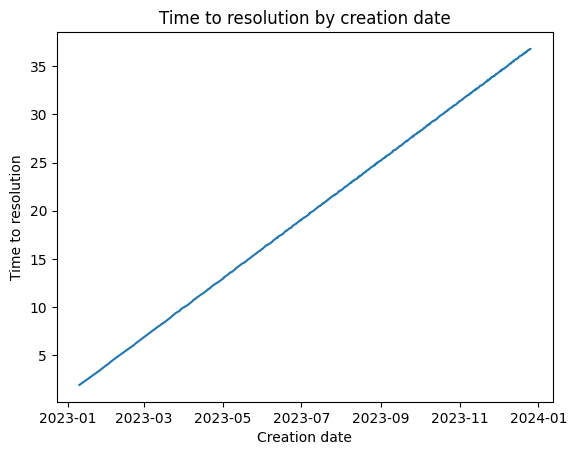

In [3]:
# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

sns.lineplot(x=df["opened_at"], y=df["resolution_time"])
plt.xlabel("Creation date")
plt.ylabel("Time to resolution")
plt.title("Time to resolution by creation date")

#### Generate JSON Description for the Insight

In [4]:
{
"data_type":"diagnostic",
"insight": "The time to resolution of incidents is increasing over time",
"insight_value":{"trend": "increasing"},
"plot": {
    "plot_type": "line",
    "title": "Trend of Time to Resolution (TTR) Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The line plot displays the trend of time to resolution (TTR) over time. Each point on the line represents the average TTR for incidents opened on a particular date. The line is generally increasing, indicating that the TTR is getting longer over time."
},
"question": "What is the trend of time to resolution (ttr) over time?",
"actionable_insight": "The increasing trend in TTR suggests that it is taking longer to resolve incidents over time. This could be due to a variety of factors such as increasing incident volume, complexity of incidents, or resource constraints. It would be beneficial to investigate these potential causes and develop strategies to improve resolution times."
}

{'data_type': 'diagnostic',
 'insight': 'The time to resolution of incidents is increasing over time',
 'insight_value': {'trend': 'increasing'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Time to Resolution (TTR) Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The line plot displays the trend of time to resolution (TTR) over time. Each point on the line represents the average TTR for incidents opened on a particular date. The line is generally increasing, indicating that the TTR is getting longer over time.'},
 'question': 'What is the trend of time to resolution (ttr) over time?',
 'actionable_insight': 'The increasing trend in TTR suggests that it is taking longer to resolve incidents over time. This could be due to a var

### **Question 2:** Is there a correlation between the volume of incidents and the ttr?

#### Plot correlation between volume of incidents and TTR
This cell creates a dual-axis line plot to visualize and analyze the correlation between the volume of incidents and the average Time to Resolution (TTR) over time. By displaying both metrics on a timeline, the plot helps to identify whether an increase in incident volume corresponds with changes in resolution times.

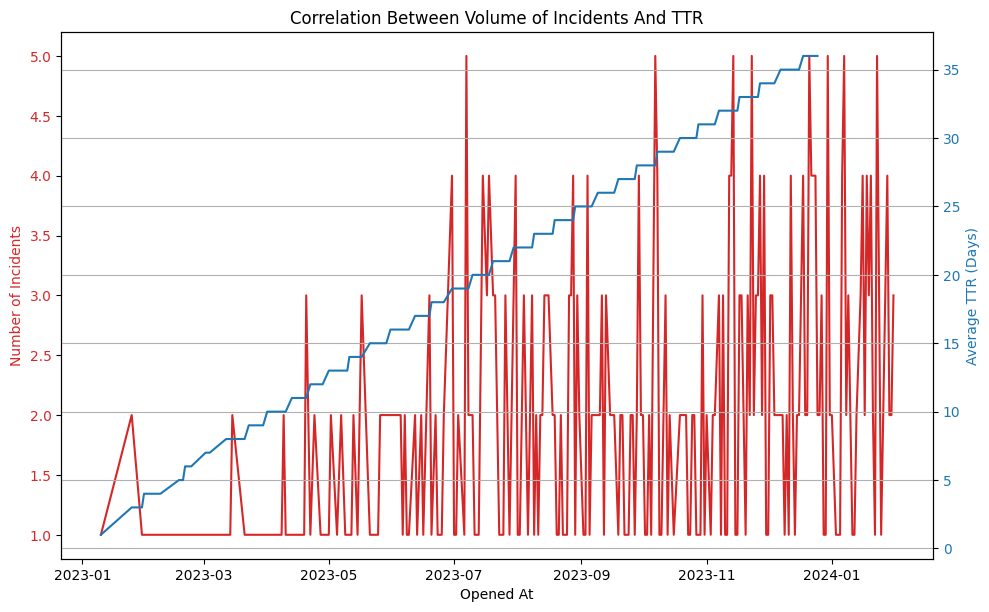

In [5]:
# Group by opened_at date and calculate count of incidents and average ttr
df['ttr'] = df['closed_at'] - df['opened_at']

# Convert ttr to days
df['ttr_days'] = df['ttr'].dt.days
incident_ttr_trend = df.groupby(df['opened_at'].dt.date).agg({'number':'count', 'ttr_days':'mean'})

# Plot the trend
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Opened At')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(incident_ttr_trend.index, incident_ttr_trend['number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average TTR (Days)', color=color)  
ax2.plot(incident_ttr_trend.index, incident_ttr_trend['ttr_days'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Correlation Between Volume of Incidents And TTR')
plt.grid(True)
plt.show()

### Generate JSON Description for the Insight

In [6]:
{
"data_type":"diagnostic",
"insight": "There is a positive correlation between the volume of incidents and the TTR",
"insight_value":{"correlation": "positive"},
"plot": {
    "plot_type": "dual_axis_line",
    "title": "Correlation Between Volume of Incidents And TTR",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis_1": {
        "name": "Number of Incidents",
        "description": "This represents the number of incidents opened on a particular date."
    },
    "y_axis_2": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation."
},
"question": "Is there a correlation between the volume of incidents and the ttr?",
"actionable_insight": "The positive correlation between the volume of incidents and the TTR suggests that as the volume of incidents increases, the TTR also tends to increase. This could be due to resource constraints or inefficiencies in handling a larger volume of incidents. It would be beneficial to assess capacity planning and process efficiency to manage high volume of incidents."
}

{'data_type': 'diagnostic',
 'insight': 'There is a positive correlation between the volume of incidents and the TTR',
 'insight_value': {'correlation': 'positive'},
 'plot': {'plot_type': 'dual_axis_line',
  'title': 'Correlation Between Volume of Incidents And TTR',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis_1': {'name': 'Number of Incidents',
   'description': 'This represents the number of incidents opened on a particular date.'},
  'y_axis_2': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation.'},
 'q

### **Question 3:** Is the increase in ttr uniform across all categories of incidents or is it more pronounced in a specific category?

#### Plot trend of TTR across categories over time
This cell creates a line plot to visualize the trends in the average Time to Resolution (TTR) across different incident categories over time. By examining TTR for each category separately, the plot provides insights into whether the increase in TTR is a uniform trend across all categories or if it is more pronounced in specific ones.

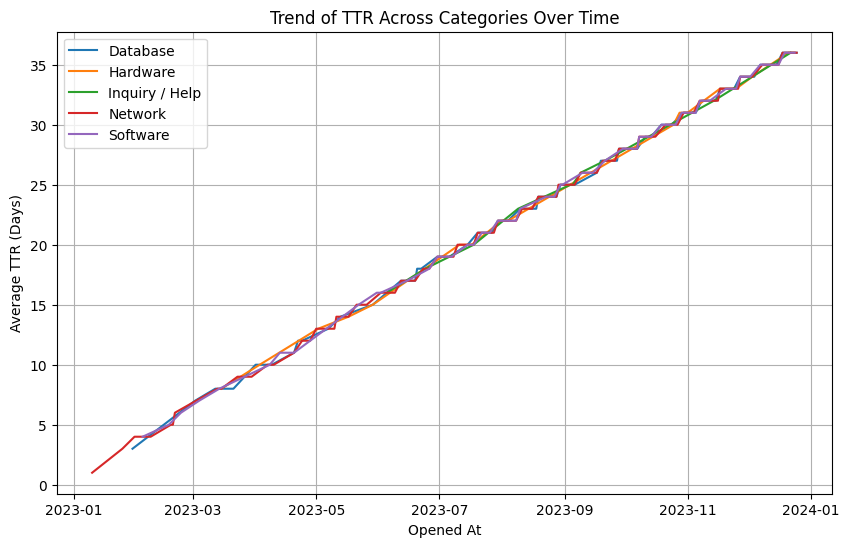

In [7]:
# Group by category and opened_at date, then calculate average ttr
category_ttr_trend = df.groupby(['category', df['opened_at'].dt.date])['ttr_days'].mean().reset_index()

# Plot the trend for each category
fig, ax = plt.subplots(figsize=(10,6))

for category in category_ttr_trend['category'].unique():
    ax.plot(category_ttr_trend[category_ttr_trend['category'] == category]['opened_at'], 
            category_ttr_trend[category_ttr_trend['category'] == category]['ttr_days'], 
            label=category)

plt.title('Trend of TTR Across Categories Over Time')
plt.xlabel('Opened At')
plt.ylabel('Average TTR (Days)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Generate JSON Description for the Insight

In [8]:
{
"data_type":"time_series",
"insight": "The increase in TTR is uniform across all categories",
"plot": {
    "plot_type": "multiple_line",
    "title": "Trend of TTR Across Categories Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The multiple line plot displays the trend of TTR across different categories over time. Each line represents a category and the points on the line represent the average TTR for incidents of that category opened on a particular date. The trend is uniform across all categories, indicating that the increase in TTR is not specific to any particular category."
},
"question": "Is the increase in ttr uniform across all categories of incidents or is it more pronounced in a specific category?",
"actionable_insight": "The uniform increase in TTR across all categories suggests that the issue is not specific to any particular category. This could indicate a systemic issue in the incident management process. It would be beneficial to investigate the overall process and identify areas for improvement to reduce the TTR."
}

{'data_type': 'time_series',
 'insight': 'The increase in TTR is uniform across all categories',
 'plot': {'plot_type': 'multiple_line',
  'title': 'Trend of TTR Across Categories Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The multiple line plot displays the trend of TTR across different categories over time. Each line represents a category and the points on the line represent the average TTR for incidents of that category opened on a particular date. The trend is uniform across all categories, indicating that the increase in TTR is not specific to any particular category.'},
 'question': 'Is the increase in ttr uniform across all categories of incidents or is it more pronounced in a specific category?',
 'actionable_insight': '

### **Question 4**: Are there any trends in the productivity of the human agents over time?

#### Plot number of incidents resolved per agent
This cell creates a bar plot to visualize the number of incidents each agent resolved, providing insights about productivity trends over time. By displaying a total incidents resolved by each agent, the plot helps identify any patterns in workload distribution and performance of agents. 

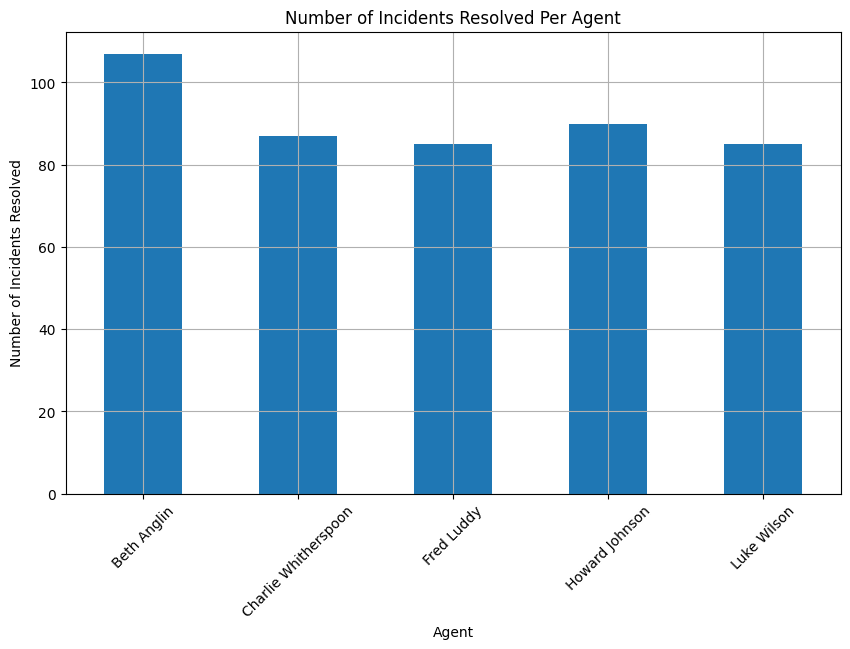

In [9]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
agent_incident_count.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents Resolved Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Resolved')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Generate JSON Description for the Insight

In [10]:
{
"data_type":"descriptive",
"insight": "The productivity levels are similar for all agents",
"plot": {
    "plot_type": "bar",
    "title": "Number of Incidents Resolved Per Agent",
    "x_axis": {
        "name": "Agent",
        "description": "This represents each agent assigned to resolve incidents."
    },
    "y_axis": {
        "name": "Number of Incidents Resolved",
        "description": "This represents the number of incidents resolved by an agent."
    },
    "description": "The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced."
},
"question": "Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent over time?",
"actionable_insight": "The uniform productivity across all agents suggests that the workload is evenly distributed and all agents are equally productive. This is a positive indicator of good workload management. However, it would still be beneficial to continually monitor agent productivity and workload to ensure this balance is maintained."
}

{'data_type': 'descriptive',
 'insight': 'The productivity levels are similar for all agents',
 'plot': {'plot_type': 'bar',
  'title': 'Number of Incidents Resolved Per Agent',
  'x_axis': {'name': 'Agent',
   'description': 'This represents each agent assigned to resolve incidents.'},
  'y_axis': {'name': 'Number of Incidents Resolved',
   'description': 'This represents the number of incidents resolved by an agent.'},
  'description': 'The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced.'},
 'question': 'Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent over time?',
 'actionable_insight': 'The uniform productivity across all agents su

### Summary of Findings (Flag 10)

1. **Distribution of Resolution Time:** Incidents have a trend that shows time to resolution (TTR) increasing linearly over time. This suggests it is taking longer to resolve incidents.
   
2. **Plausible Reason:** The analysis showed there is a correlation between the volume of incidents and the ttr. The positive correlation between the volume of incidents and the TTR suggests that as the volume of incidents increases, the TTR also tends to increase. This could be due to resource constraints or inefficiencies in handling a larger volume of incidents. Other potential reasons could include complexity of incidents, or resource constraints.
   
3. **Other Factors:** Another aspect to consider is whether agents possess the required skills and capacity to handle these incidents effectively, indicating potential areas for capacity development or process enhancement. 